# Tiền xử lí và khám phá dữ liệu

## Tóm tắt

- Xử lí dữ liệu bị thiếu, bị nhiễu

- Chuẩn hóa dữ liệu

### 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

### 2. Tiền xử lí dữ liệu

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Tiền xử lý dữ liệu  </b></font>

<font color="red"><b>Câu hỏi: </b></font> <font color="red">Trong Khoa học dữ liệu, tại sao phải tiền xử lý dữ liệu? Và những bước tiền xử lý dữ liệu diện ra như thế nào? </font>

<font color="red"><b>Trả lời :</b></font> <font color="red">
- Trong khoa học dữ liệu tiền xử lý dữ liệu quan trọng bởi vì những lý do sau:
  - Cải thiện Chất lượng Dữ liệu: Dữ liệu thô thường chứa nhiều lỗi như giá trị thiếu, không nhất quán, hoặc nhiễu. Tiền xử lý giúp làm sạch và chuẩn hóa dữ liệu, đảm bảo tính chính xác và đáng tin cậy cho phân tích.
  - Phát hiện và Xử lý Dữ liệu Ngoại lai: Dữ liệu ngoại lai có thể gây ra những hiểu lầm trong quá trình phân tích. Tiền xử lý giúp xác định và xử lý chúng một cách phù hợp.
  - Chuẩn hóa và Chuyển đổi Dữ liệu: Điều này bao gồm việc chuyển đổi dữ liệu sang các định dạng thích hợp hoặc chuẩn hóa các đặc trưng để chúng có thể được so sánh và phân tích một cách công bằng.
  - Giảm Kích thước và Tính phức tạp: Tiền xử lý có thể giúp giảm kích thước dữ liệu bằng cách loại bỏ các đặc trưng không quan trọng hoặc thông tin dư thừa, giúp quá trình học máy hiệu quả hơn.
  - Tăng cường Hiểu biết về Dữ liệu: Quá trình này cũng giúp các nhà khoa học dữ liệu hiểu rõ hơn về bản chất của dữ liệu, qua đó đưa ra những quyết định phân tích chính xác hơn.
- Các bước tiền xử lý dữ liệu là:
  - Làm sạch dữ liệu ( Data cleaning): Thường chúng ta sẽ Xử lý giá trị bị thiếu (Missing value) và loại bỏ các giá trị ngoại lai (Outlier) trong dữ liệu.
  - Chuẩn hóa và biến đổi dữ liệu (Data transformatrion): Đưa các giá trị về đúng kiểu dữ liệu, xác định biến số và biến phân loại của dữ liệu.
 </font>

</div>

In [2]:
df = pd.read_csv('data/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


- Chúng ta sẽ loại bỏ các cột không có nhiều tác dụng trong bài làm của nhóm. Các cột đó là 'Timestamp', 'Permissions' 

In [3]:
df.drop(['Timestamp', 'Permissions'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

In [5]:
# Dữ liệu có bị trùng lặp không
df.duplicated().sum()
if df.duplicated().sum() == 0:
    print('Không có dữ liệu trùng lặp')
else:
    print('Dữ liệu có trùng lặp')
    df.drop_duplicates(inplace=True)
    print('Đã xóa các dữ liệu trùng lặp')
    print('Số dữ liệu còn lại: ', df.shape[0])

Không có dữ liệu trùng lặp


In [6]:
# Dữ liệu có bao nhiêu dòng, cột
n_rows, n_cols = df.shape
print(f'Số dòng của dữ liệu là: {n_rows}')
print(f'Số cột của dữ liệu là: {n_cols}')

Số dòng của dữ liệu là: 736
Số cột của dữ liệu là: 31


- Kiểm tra dữ liệu có bị thiếu không

In [7]:
# Số dữ liệu bị thiếu 
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(missing_values, columns=['Missing Value'])
missing_df

,Missing Value
BPM,107
Music effects,8
Foreign languages,4
Instrumentalist,4
While working,3
Primary streaming service,1
Age,1
Composer,1
Exploratory,0
Frequency [Metal],0


- Vì những giá trị thiếu là khá ít ngoại trừ cột BPM nên nhóm quyết định sẽ xóa những dòng bị thiếu dữ liệu ngoại trừ những dòng thiếu dữ liệu cột 'BPM'. 

In [8]:
cols_with_few_missing_values = missing_values[missing_values < 10].index
df = df.dropna(subset=cols_with_few_missing_values)
df.shape

(718, 31)

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý dữ liệu bị thiếu  </b></font>

<font color="red"><b>Trả lời :</b></font> <font color="red">
- Có nhiều cách để xử lý giá trị bị thiếu :
  - Loại bỏ dữ liệu : Xóa những dòng hoặc cột có dữ liệu bị thiếu đi
  - Điền khuyết dựa trên thống kê: Trung bình, trung vị, mode, ...
  - Dựa trên mô hình: K-Nearest Neighbors, Regression, ...
=> Trong phần này chúng em muốn dựa theo mô hình KNN để xử lý những giá trị bị thiếu của cột BPM
 </font>
</div>

- Một trong những điều quan trong nhất trước khi KNN là phải xử lý những dữ liệu outlier. Chỉ cần một giá trị outlier cực kỳ lớn hoặc cực kỳ nhỏ cũng làm sai lệch đến kết quả. Vì vậy, chúng ta cần phải xử lý những giá trị này trước khi thực hiện KNN.
- Sử dụng IQR để tìm ra các giá trị outlier của cột BPM

In [9]:
q1_bpm = df['BPM'].dropna().quantile(0.25)
q3_bpm = df['BPM'].dropna().quantile(0.75)
iqr_bpm = q3_bpm - q1_bpm
lower_bound_bpm = q1_bpm - 1.5 * iqr_bpm
upper_bound_bpm = q3_bpm + 1.5 * iqr_bpm
print(f'Lower bound của BPM là: {lower_bound_bpm}')
print(f'Upper bound của BPM là: {upper_bound_bpm}')
num_outliers = len(df[(df['BPM'] < lower_bound_bpm) | (df['BPM'] > upper_bound_bpm)])

print(f'Số lượng outlier của cột BPM là: {num_outliers}')
# In ra những dòng bị outlier
df[(df['BPM'] < lower_bound_bpm) | (df['BPM'] > upper_bound_bpm)]

Lower bound của BPM là: 34.0
Upper bound của BPM là: 210.0
Số lượng outlier của cột BPM là: 11


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
248,20.0,Spotify,2.0,No,Yes,Yes,Metal,No,Yes,220.0,...,Never,Never,Rarely,Sometimes,Rarely,0.0,0.0,0.0,1.0,No effect
339,35.0,Spotify,3.0,No,Yes,No,Folk,Yes,No,0.0,...,Rarely,Never,Never,Sometimes,Sometimes,8.0,2.0,2.0,8.0,No effect
372,18.0,Spotify,2.0,Yes,No,No,Hip hop,Yes,Yes,20.0,...,Sometimes,Very frequently,Very frequently,Never,Never,10.0,7.0,2.0,0.0,Improve
429,73.0,Pandora,3.0,Yes,No,No,R&B,Yes,Yes,4.0,...,Sometimes,Very frequently,Sometimes,Sometimes,Never,5.0,4.0,0.0,1.0,Improve
524,28.0,Spotify,3.0,No,Yes,Yes,Metal,Yes,Yes,0.0,...,Rarely,Sometimes,Never,Very frequently,Very frequently,8.0,8.0,5.0,2.0,Improve
567,68.0,Pandora,1.0,Yes,No,No,Gospel,No,No,8.0,...,Never,Never,Never,Never,Never,10.0,10.0,10.0,0.0,Improve
568,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,...,Sometimes,Never,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect
610,56.0,I do not use a streaming service.,2.0,Yes,No,No,Rock,No,Yes,220.0,...,Never,Never,Rarely,Very frequently,Never,3.0,3.0,1.0,8.0,No effect
639,30.0,I do not use a streaming service.,0.0,No,No,No,Metal,No,No,0.0,...,Never,Never,Rarely,Rarely,Rarely,10.0,10.0,10.0,9.0,Improve
644,16.0,Other streaming service,4.0,Yes,No,No,EDM,Yes,Yes,624.0,...,Never,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve


- Những con số outlier như 999999999.0, 624.0, 0 gây tác động rất tiêu cực đến kết quả của mô hình. Vì BPM của một bài hát chỉ nằm trong khoảng 24-220 BPM. Trong trường hợp này bởi vì tiếp theo chúng em sẽ điền khuyết bằng KNN nên tạm thời chuyển những giá trị này thành np.nan và đưa vào mô hình.

In [10]:
print(f'Số lượng missing values của BPM là: {df["BPM"].isnull().sum()}')
df.loc[(df['BPM'] < lower_bound_bpm) | (df['BPM'] > upper_bound_bpm), 'BPM'] = np.nan
print(f'Sau khi chuyển nhiễu thành nan, số lượng missing values của BPM là: {df["BPM"].isnull().sum()}')
df[df['BPM'].isnull()]

Số lượng missing values của BPM là: 102
Sau khi chuyển nhiễu thành nan, số lượng missing values của BPM là: 113


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
10,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
15,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
37,17.0,Other streaming service,3.0,Yes,No,No,Pop,Yes,No,NaN,...,Very frequently,Sometimes,Very frequently,Very frequently,Never,2.0,0.0,4.0,0.0,No effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


In [11]:
df_KNN = df.copy()

# Mã hóa các cột có kiểu dữ liệu là object
# Mỗi giá trị duy nhất trong cột phân loại sẽ được chuyển thành một cột mới trong DataFrame. 
# Các cột mới này sẽ chứa giá trị 1 nếu hàng tương ứng có giá trị đó cho biến phân loại, và 0 nếu không.
print(f'Số lượng cột của df_KNN trước khi mã hóa là: {df_KNN.shape[1]}') 
df_KNN = pd.get_dummies(df_KNN, drop_first=True)
print(f'Số lượng cột của df_KNN sau khi mã hóa là: {df_KNN.shape[1]}') 

#  Xử lý dữ liệu thiếu của cột BPM với KNN
print(f'Trước khi KNN, Số giá trị còn thiếu của cột BPM là: {df_KNN["BPM"].isnull().sum()}')

imputer = KNNImputer(n_neighbors=10)
df_imputer = imputer.fit_transform(df_KNN)
df_KNN = pd.DataFrame(df_imputer, columns=df_KNN.columns, index=df_KNN.index) 

print(f'Sau khi KNN, Số giá trị còn thiếu của cột BPM là: {df_KNN["BPM"].isnull().sum()}')
# In tra ra các giá trị đã điền vào df_KNN, lấy index từ df
df_KNN[df['BPM'].isnull()]

Số lượng cột của df_KNN trước khi mã hóa là: 31
Số lượng cột của df_KNN sau khi mã hóa là: 82
Trước khi KNN, Số giá trị còn thiếu của cột BPM là: 113
Sau khi KNN, Số giá trị còn thiếu của cột BPM là: 0


,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Primary streaming service_I do not use a streaming service.,Primary streaming service_Other streaming service,Primary streaming service_Pandora,...,Frequency [Rap]_Sometimes,Frequency [Rap]_Very frequently,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_No effect,Music effects_Worsen
10,18.0,3.0,123.5,7.0,7.0,4.0,7.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15,17.0,2.0,142.0,7.0,5.0,4.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,20.0,5.0,134.5,7.0,7.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
32,19.0,6.0,113.9,9.0,8.0,2.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
37,17.0,3.0,119.2,2.0,0.0,4.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,4.0,125.3,8.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
700,20.0,1.0,136.8,8.0,9.0,6.0,5.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
706,23.0,1.0,122.9,8.0,6.0,1.0,4.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
712,23.0,3.0,129.6,10.0,5.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Như vậy không còn giá trị còn thiếu sau khi chạy KNN, ta sẽ điền , 
# Chúng em sẽ điền những giá trị đúng vào những giá trị còn thiếu của df ban đầu.
df.loc[df['BPM'].isnull(), 'BPM'] = df_KNN.loc[df['BPM'].isnull(), 'BPM'].round(0)
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_df = pd.DataFrame(missing_values, columns=['Missing Value'])
missing_df

,Missing Value
Age,0
Frequency [Jazz],0
OCD,0
Insomnia,0
Depression,0
Anxiety,0
Frequency [Video game music],0
Frequency [Rock],0
Frequency [Rap],0
Frequency [R&B],0


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Xử lý nhiễu  </b></font>

<font color="red"><b>Tại sao phải xử lý dữ liệu bị nhiễu: </b></font> <font color="red">
- Xử lý nhiễu (noise) trong dữ liệu là một phần quan trọng của quá trình tiền xử lý trong khoa học dữ liệu. Nhiễu có thể làm giảm chất lượng dữ liệu để phân tích và đánh giá, vì vậy việc xác định và xử lý nhiễu là cần thiết.

- Những ký thuật tìm ra và xử lý nhiễu có thể là : 
  - Sử dụng IQR để tìm ra các giá trị outlier của cột BPM
 </font>
</div>

- Dựa vào kết quả trên nhóm nhận thấy cột 'BPM' và 'Hours per day' có những giá trị gây nhiễu cần phải xử lí nên nhóm sẽ xử lí nhiễu trước.

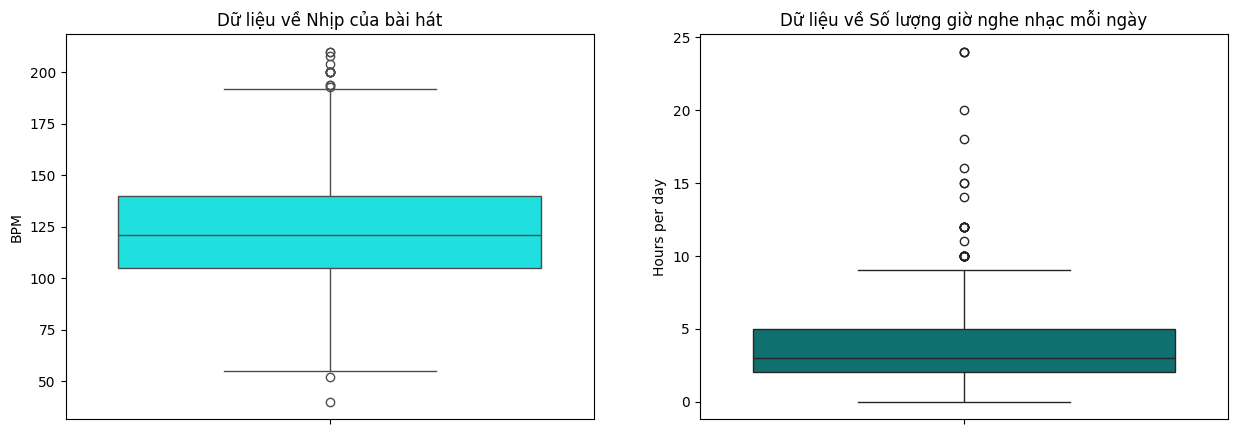

In [13]:
#Vẽ 2 biểu đồ boxplot cho 2 cột BPM và Hours per day
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(y=df['BPM'], ax=ax[0], color='cyan')
sns.boxplot(y=df['Hours per day'], ax=ax[1], color='teal')
ax[0].set_title('Dữ liệu về Nhịp của bài hát')
ax[1].set_title('Dữ liệu về Số lượng giờ nghe nhạc mỗi ngày')
plt.show()

- Mặc dù đã xử lí nhiễu và nhờ KNN điền giúp nhưng dữ liệu vẫn outlier do đó nhóm sẽ xử lí nhiễu một lần nữa ở cột BPM.

In [14]:
# Đánh giá nhiễu
q1_bpm = df['BPM'].quantile(0.25)
q3_bpm = df['BPM'].quantile(0.75)
iqr_bpm = q3_bpm - q1_bpm
lower_bound_bpm = q1_bpm - 1.5 * iqr_bpm
upper_bound_bpm = q3_bpm + 1.5 * iqr_bpm
print(f'Lower bound của BPM là: {lower_bound_bpm}')
print(f'Upper bound của BPM là: {upper_bound_bpm}')
num_outliers = len(df[(df['BPM'] < q1_bpm - 1.5 * iqr_bpm) | (df['BPM'] > q3_bpm + 1.5 * iqr_bpm)])
print(f'Số dòng dữ liệu nhiễu của BPM là: {num_outliers}')

q1_hours = df['Hours per day'].quantile(0.25)
q3_hours = df['Hours per day'].quantile(0.75)
iqr_hours = q3_hours - q1_hours
lower_bound_hours = q1_hours - 1.5 * iqr_hours
upper_bound_hours = q3_hours + 1.5 * iqr_hours
print(f'Lower bound của Hours per day là: {lower_bound_hours}')
print(f'Upper bound của Hours per day là: {upper_bound_hours}')
num_outliers = len(df[(df['Hours per day'] < q1_hours - 1.5 * iqr_hours) | (df['Hours per day'] > q3_hours + 1.5 * iqr_hours)])
print(f'Số dòng dữ liệu nhiễu của Hours per day là: {num_outliers}')

# Xóa nhiễu
df = df[(df['BPM'] >= lower_bound_bpm) & (df['BPM'] <= upper_bound_bpm)]
df = df[(df['Hours per day'] >= lower_bound_hours) & (df['Hours per day'] <= upper_bound_hours)]
df.shape

Lower bound của BPM là: 52.5
Upper bound của BPM là: 192.5
Số dòng dữ liệu nhiễu của BPM là: 16
Lower bound của Hours per day là: -2.5
Upper bound của Hours per day là: 9.5
Số dòng dữ liệu nhiễu của Hours per day là: 38


(666, 31)

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Chuẩn hóa dữ liệu  và đánh giá dữ liệu  </b></font>

<font color="red"><b>Đưa kiểu dữ liệu về đúng kiểu sau đó đánh giá lại các cột xem có vấn đề gì không ?</b></font> 
</div>

In [15]:
df['Anxiety'].value_counts()

Anxiety
7.0     109
8.0     104
6.0      81
3.0      62
10.0     61
5.0      53
4.0      48
9.0      47
2.0      42
0.0      30
1.0      28
7.5       1
Name: count, dtype: int64

=> Vậy các mức độ tâm thần được đánh giá từ 1-10 được làm trón đến 0.5. Điều này sẽ khó khăn cho việc phân tích đây là biến phân loại hay số. Thêm vào đó theo như tác giả 0 đại diện cho "Tôi đã từng trải qua" và 10 đại diện cho "Tôi  trải qua cực kỳ nhiều" nhưng trong dữ liệu lại có giá trị 0.5. Vì vậy nhóm quyết định sẽ làm tròn các giá trị này lên số nguyên từ 0-10.

In [16]:
mental_health = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
# Làm tròn các giá trị lên số nguyên gần nhất nhưng không vượt quá 10
for col in mental_health:
    df[col] = [min(round(x), 10) for x in df[col]]
    
df[mental_health] = df[mental_health].astype('int64')
# Kiểm tra lại value_counts của 4 loại bệnh
for col in mental_health:
    print(df[col].value_counts().sort_index())


Anxiety
0      30
1      28
2      42
3      62
4      48
5      53
6      81
7     109
8     105
9      47
10     61
Name: count, dtype: int64
Depression
0     74
1     38
2     83
3     54
4     56
5     54
6     80
7     88
8     72
9     33
10    34
Name: count, dtype: int64
Insomnia
0     137
1      78
2      79
3      62
4      56
5      48
6      55
7      56
8      46
9      21
10     28
Name: count, dtype: int64
OCD
0     223
1      88
2      88
3      59
4      46
5      46
6      30
7      29
8      24
9      14
10     19
Name: count, dtype: int64


In [17]:
df['BPM'].value_counts()

BPM
120.0    50
140.0    23
130.0    20
150.0    17
110.0    16
         ..
175.0     1
190.0     1
167.0     1
164.0     1
168.0     1
Name: count, Length: 119, dtype: int64

In [18]:
df['Hours per day'].value_counts()

Hours per day
2.00    168
1.00    114
3.00    110
4.00     81
5.00     50
6.00     46
8.00     28
0.50     20
7.00     15
1.50     14
2.50      6
0.00      5
0.25      3
9.00      3
0.70      1
4.50      1
0.10      1
Name: count, dtype: int64

- Vậy các cột BPM và Hours per day là các số nguyên nên chúng ta sẽ đưa về kiểu dữ liệu int.

In [19]:
for col in df.columns:
    if col in ['BPM', 'Hours per day', 'Age']:
        df[col] = df[col].apply(lambda x: np.int64(x))
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           666 non-null    int64 
 1   Primary streaming service     666 non-null    object
 2   Hours per day                 666 non-null    int64 
 3   While working                 666 non-null    object
 4   Instrumentalist               666 non-null    object
 5   Composer                      666 non-null    object
 6   Fav genre                     666 non-null    object
 7   Exploratory                   666 non-null    object
 8   Foreign languages             666 non-null    object
 9   BPM                           666 non-null    int64 
 10  Frequency [Classical]         666 non-null    object
 11  Frequency [Country]           666 non-null    object
 12  Frequency [EDM]               666 non-null    object
 13  Frequency [Folk]         

- Sau khi điền khuyết và xử lý nhiễu, chúng ta cùng đánh giá các cột số

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 2 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           666 non-null    int64 
 1   Primary streaming service     666 non-null    object
 2   Hours per day                 666 non-null    int64 
 3   While working                 666 non-null    object
 4   Instrumentalist               666 non-null    object
 5   Composer                      666 non-null    object
 6   Fav genre                     666 non-null    object
 7   Exploratory                   666 non-null    object
 8   Foreign languages             666 non-null    object
 9   BPM                           666 non-null    int64 
 10  Frequency [Classical]         666 non-null    object
 11  Frequency [Country]           666 non-null    object
 12  Frequency [EDM]               666 non-null    object
 13  Frequency [Folk]         

In [21]:
# Đánh giá các cột số của Data
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000
mean,25.252252,3.027027,121.981982,5.821321,4.758258,3.671171,2.621622
std,11.828322,2.014800,26.927689,2.786039,2.977631,3.063485,2.836563
min,10.000000,0.000000,55.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,105.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,4.000000,139.750000,8.000000,7.000000,6.000000,4.000000
max,80.000000,9.000000,192.000000,10.000000,10.000000,10.000000,10.000000


- Vậy dữ liệu có 7 cột số nguyên
- Tiếp theo, nhóm sẽ tiến hành xem xét các cột chứa dữ liệu không phải số

In [22]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Primary streaming service,666,6,Spotify,412
While working,666,2,Yes,520
Instrumentalist,666,2,No,452
Composer,666,2,No,557
Fav genre,666,16,Rock,167
Exploratory,666,2,Yes,470
Foreign languages,666,2,Yes,362
Frequency [Classical],666,4,Rarely,236
Frequency [Country],666,4,Never,307
Frequency [EDM],666,4,Never,279


In [23]:
# Lưu dữ liệu vào file csv
df.to_csv('data/mxmh_survey_results_clean.csv', index=False)